In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo

In [2]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

# Z = bathy.variables['Bathymetry'][y_wcvi_slice,x_wcvi_slice]
Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)

# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]

In [3]:
NEP_iso_jul = nc.Dataset('/home/ssahu/saurav/jul_along_iso.nc')

In [4]:
nc_tools.show_variables(NEP_iso_jul)

odict_keys(['x', 'y', 'isot', 'time_counter', 'spiciness'])


In [5]:
spic_jul_iso = NEP_iso_jul.variables['spiciness']
iso_rho_levels = NEP_iso_jul.variables['isot'] 

In [6]:
iso_rho_levels.shape

(128,)

In [7]:
spic_jul_iso.shape

(31, 128, 120, 100)

In [8]:
iso_rho_levels[0]

23.0

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


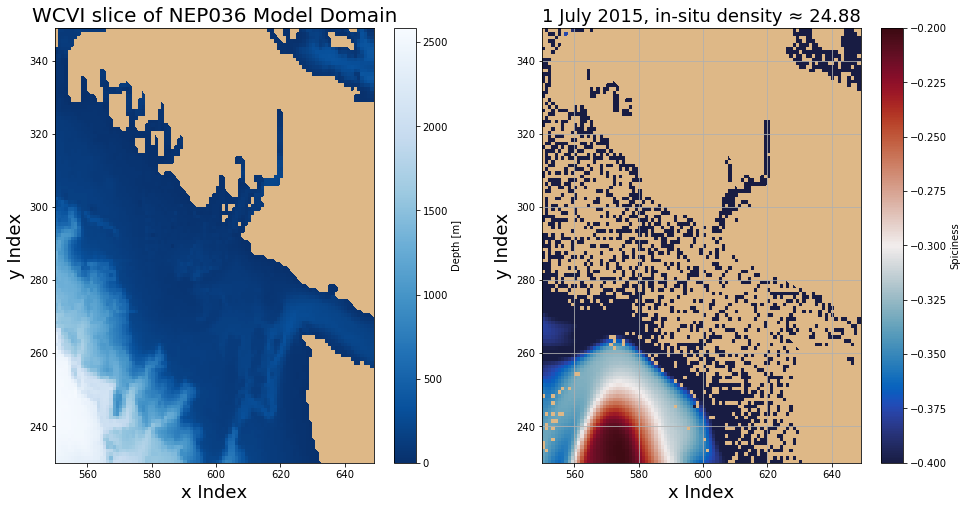

In [53]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul = 0
level = 60
spic_tzyx = spic_jul_iso[t_jul,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
# ax1.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.4, vmax = -0.2)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_jul+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


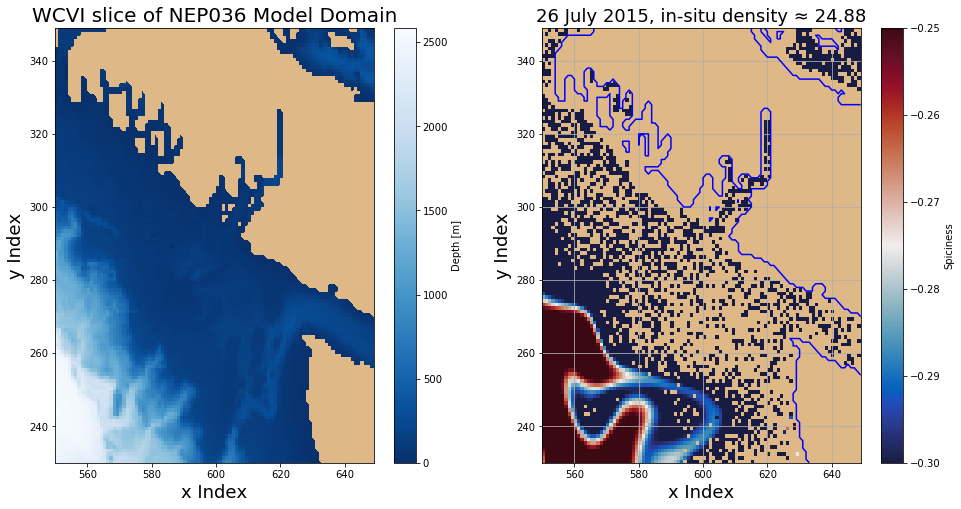

In [58]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul = 25
level = 60
spic_tzyx = spic_jul_iso[t_jul,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
# ax1.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.3, vmax = -0.25)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='b')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_jul+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


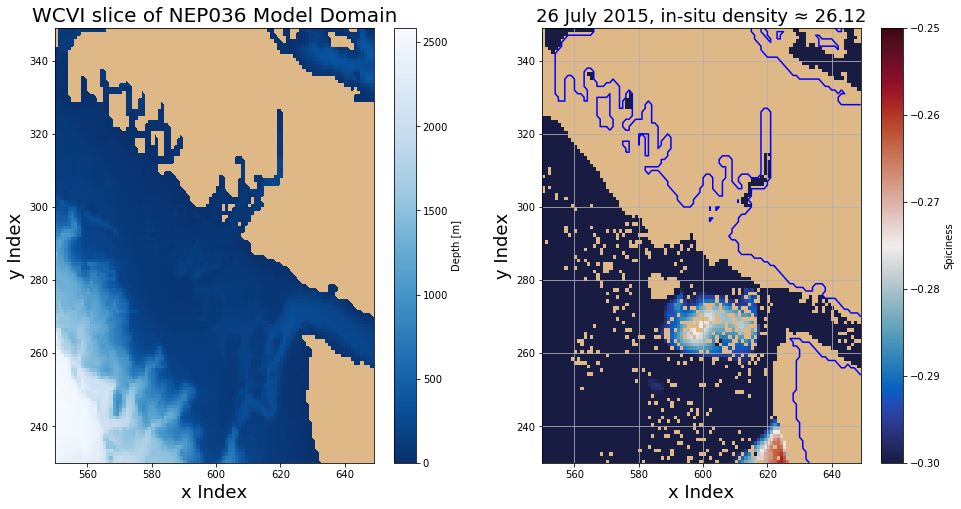

In [57]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul = 25
level = 100
spic_tzyx = spic_jul_iso[t_jul,level,:,:]
spic_tzyx[np.isnan(spic_tzyx)] = 0
spic_tzyx = np.ma.masked_values(spic_tzyx, 0)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
# ax1.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_tzyx, cmap=cmap, vmin = -0.3, vmax = -0.25)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
viz_tools.plot_coastline(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='b')
# ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, in-situ density \u2248 {d:.2f}'.format(t_jul+1, d=iso_rho_levels[level], z=iso_rho_levels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


In [31]:
np.min(spic_tzyx)

0.0